In [717]:
# importing the required libraries

import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [718]:
#Loading the traning set data
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [719]:
#Loading the test set data
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [720]:
#checking for null value in the traning set data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [721]:
#checking for null value in the test set data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [722]:
# getting the number of rows and column in both the training and test set
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [723]:
# checking the data types for the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [724]:
#checking the data types for the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [725]:
#Checking for outliers in the train set data using the describe function
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [726]:
#Checking for outliers in the test set data using the describe function
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [727]:
# data visualisation of the categorical data in the train set data

def plot_survival_distribution(feature, train):
# Filter train data set for survived and dead passengers
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
# Create a DataFrame from the counts
    df = pd.DataFrame({'Survived': survived, 'Dead': dead})
# Plot the bar chart
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'Distribution of {feature} for Survived and Dead Passengers')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()




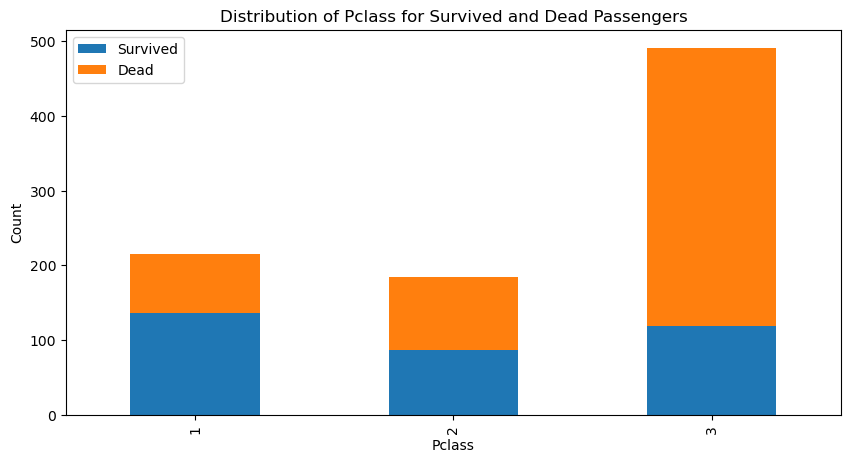

In [728]:
# Visualising the  survived and dead status for the ticket type in the train dataset
plot_survival_distribution('Pclass', train)

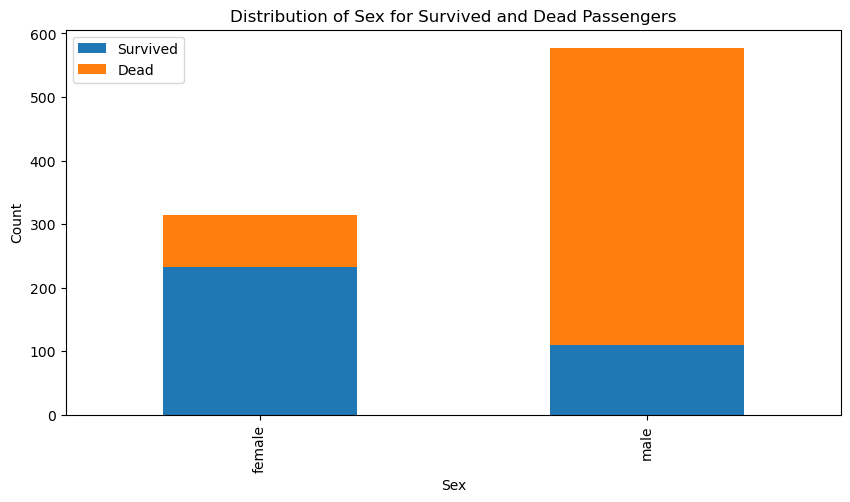

In [729]:
# Visualising the  survived and dead status for the sex in the train dataset
plot_survival_distribution('Sex', train)

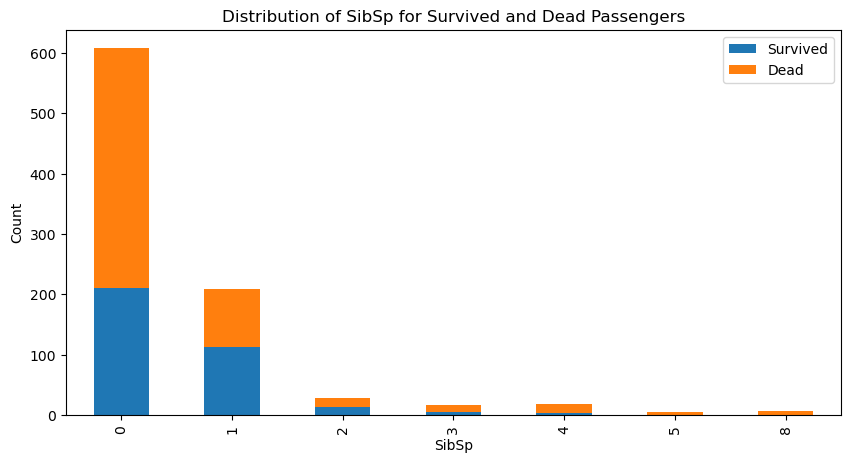

In [730]:
# Visualising the  survived and dead status for the number of siblings/spouse aboard in the train dataset
plot_survival_distribution('SibSp', train)

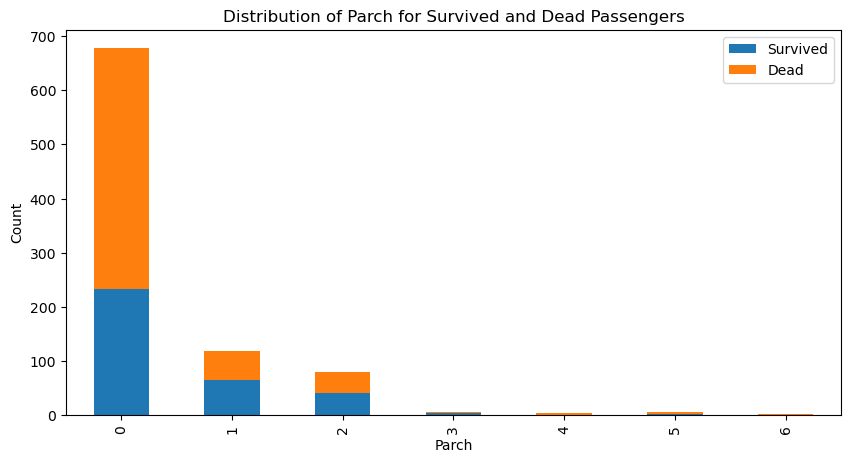

In [731]:
# Visualising the  survived and dead status for the number of parents / children aboard the Titanic  in the train dataset
plot_survival_distribution('Parch', train)

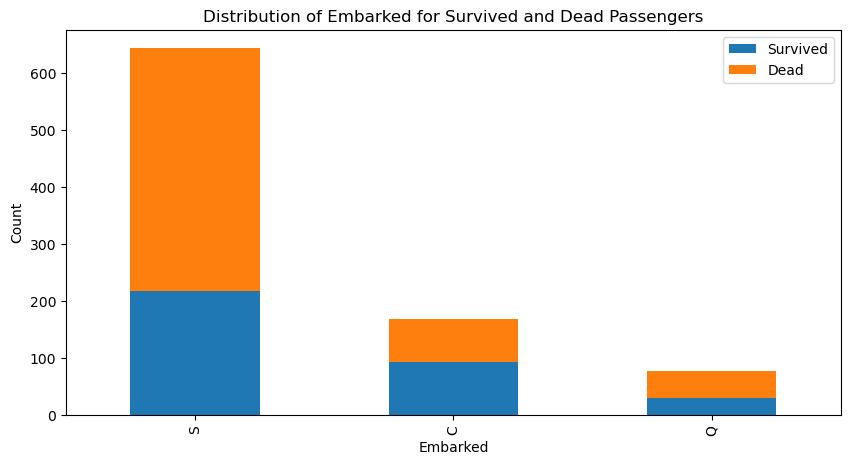

In [732]:
# Visualising the  survived and dead status  based on the Port of Embarkation in the train dataset
plot_survival_distribution('Embarked', train)

In [733]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [734]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [735]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [736]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in [train,test]:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [737]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [738]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [739]:
# mapping the sex column

sex_mapping = {"male": 0, "female": 1}
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [740]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [741]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,2


In [742]:
#checking if the age column in the train dataset has any missing value

if train['Age'].isnull().any():
    print("The 'Age' column has mis#sing values.")
else:
    print("No missing values in the 'Age' column.")

The 'Age' column has mis#sing values.


In [743]:
# checking if the age column in the test dataset has any missing value

if test['Age'].isnull().any():
    print("The 'Age' column has missing values.")
else:
    print("No missing values in the 'Age' column.")

The 'Age' column has missing values.


In [744]:
# Fill missing values in the "Age" column of the 'train' dataframe based on median ages for each 'Title'
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)

# Fill missing values in the "Age" column of the 'test' dataframe based on median ages for each 'Title'
test["Age"].fillna(test.groupby('Title')['Age'].transform("median"), inplace=True)


In [745]:
#checking if the age column in the train dataset has any missing value

if train['Age'].isnull().any():
    print("The 'Age' column has mis#sing values.")
else:
    print("No missing values in the 'Age' column.")

No missing values in the 'Age' column.


In [746]:
# checking if the age column in the test dataset has any missing value

if test['Age'].isnull().any():
    print("The 'Age' column has missing values.")
else:
    print("No missing values in the 'Age' column.")

No missing values in the 'Age' column.


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


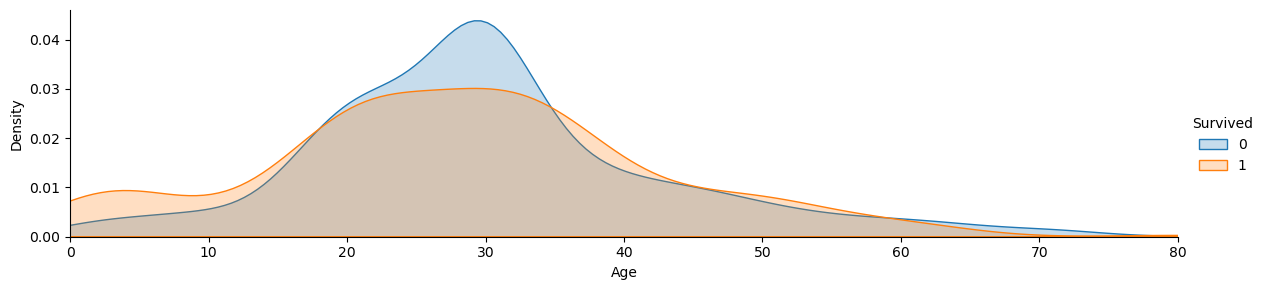

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


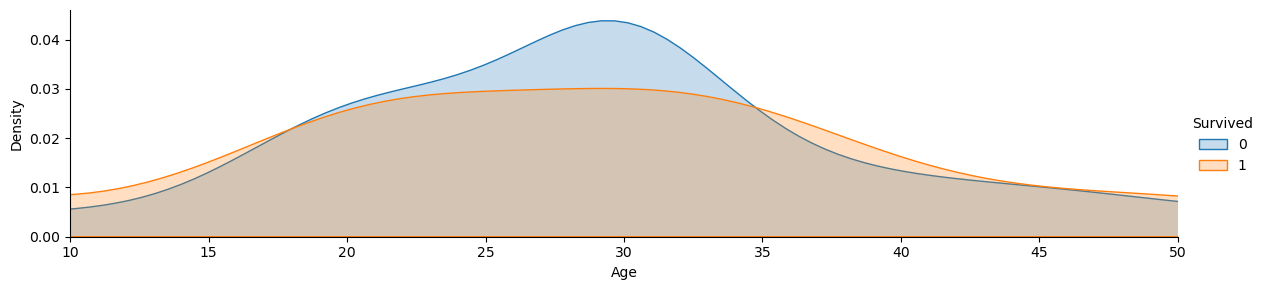

In [747]:
#creating KDE plot for age variable in train dataset
# Create a FacetGrid with KDE plots for Age, divided by Survived
def create_age_plots(data, xlim=None):
    facet = sns.FacetGrid(data, hue="Survived", aspect=4)
    facet.map(sns.kdeplot, 'Age', fill=True)
    facet.set(xlim=(0, data['Age'].max()))
    facet.add_legend()
    
    if xlim:
        plt.xlim(xlim)
    
    plt.show()

# Call the function with the training data
create_age_plots(train)

# Call the function with restricted x-axis limits
create_age_plots(train, xlim=(10, 50))


In [748]:
for dataset in [train,test]:
    dataset['Age'] = pd.cut(dataset['Age'], bins=[-float('inf'), 16, 26, 36, 62, float('inf')], labels=[0, 1, 2, 3, 4], include_lowest=True)


In [749]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,0


In [750]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,S,2


In [751]:
#checking if the Embarked column in the train dataset has any missing value

if train['Embarked'].isnull().any():
    print("The 'Embarked' column has missing values.")
else:
    print("No missing values in the 'Embarked' column.")

The 'Embarked' column has missing values.


In [752]:
#checking if the Embarked column in the test dataset has any missing value

if test['Embarked'].isnull().any():
    print("The 'Embarked' column has missing values.")
else:
    print("No missing values in the 'Embarked' column.")

No missing values in the 'Embarked' column.


In [753]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,0


In [754]:
class_counts = train.groupby('Embarked').size()

# Display the result
print(class_counts)

Embarked
C    168
Q     77
S    644
dtype: int64


In [755]:
# replacing the null value in Embarked column with S port of embarkation

train['Embarked'] = train['Embarked'].fillna('S')


In [756]:
# now checking again if the Embarked column in the test dataset has any missing value

if test['Embarked'].isnull().any():
    print("The 'Embarked' column has missing values.")
else:
    print("No missing values in the 'Embarked' column.")

No missing values in the 'Embarked' column.


In [757]:
# mapping the data in the embarked column
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in [train,test]:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [758]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,0


In [759]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,2


In [760]:
# Fill missing Fare values with the median Fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

# Display the first 50 rows of the updated train dataset
train.head(50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,2,0,0,330877,8.4583,NaN,2,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,1,0,237736,30.0708,NaN,1,2


In [761]:
# Display the first 50 rows of the updated test dataset
test.head(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,2
5,897,3,"Svensson, Mr. Johan Cervin",0,0,0,0,7538,9.2250,NaN,0,0
6,898,3,"Connolly, Miss. Kate",1,2,0,0,330972,7.6292,NaN,2,1
7,899,2,"Caldwell, Mr. Albert Francis",0,1,1,1,248738,29.0000,NaN,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1,0,0,2657,7.2292,NaN,1,2
9,901,3,"Davies, Mr. John Samuel",0,1,2,0,A/4 48871,24.1500,NaN,0,0


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


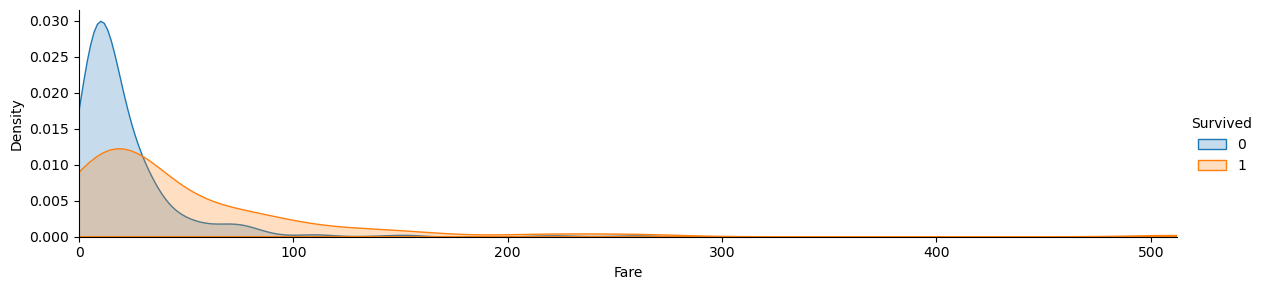

In [762]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', fill = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 20.0)

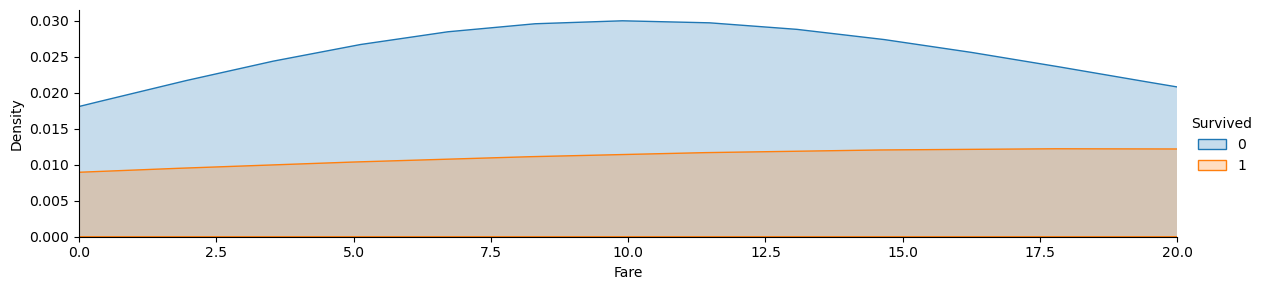

In [763]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',fill= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [764]:
for dataset in [train,test]:
    dataset['FareCategory'] = pd.cut(dataset['Fare'], bins=[-float('inf'), 17, 30, 100, float('inf')], labels=[0, 1, 2, 3], include_lowest=True)


In [765]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,0,0


In [766]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,0,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,2,0


In [767]:
# getting the unique cabin type in train data set
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [768]:
# getting the unique cabin type in test data set
test.Cabin.value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [769]:
# Extrating the first letter of the character in the cabin column
for dataset in [train,test]:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

In [770]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,0,0


In [771]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2,0,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,NaN,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,2,0


In [772]:
class_counts = train.groupby('Cabin').size()

# Display the result
print(class_counts)

Cabin
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
dtype: int64


In [773]:
class_counts = test.groupby('Cabin').size()

# Display the result
print(class_counts)

Cabin
A     7
B    18
C    35
D    13
E     9
F     8
G     1
dtype: int64


In [774]:
# replacing the null value in Cabin column with C cabin class

train['Cabin'] = train['Cabin'].fillna('C')
test['Cabin'] = test['Cabin'].fillna('C')


In [775]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,C,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,C,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,C,0,0,0


In [776]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,C,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,C,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,C,2,0,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,C,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,C,0,2,0


In [777]:
# mapping the cabin column to prepare it as input into a ML model
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

for dataset in [train,test]:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)


In [778]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,0.8,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,0.8,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,0.8,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,0.8,0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,0.8,0,0,0


In [779]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,0.8,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,0.8,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,0.8,2,0,0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,0.8,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,0.8,0,2,0


In [780]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 11.0)

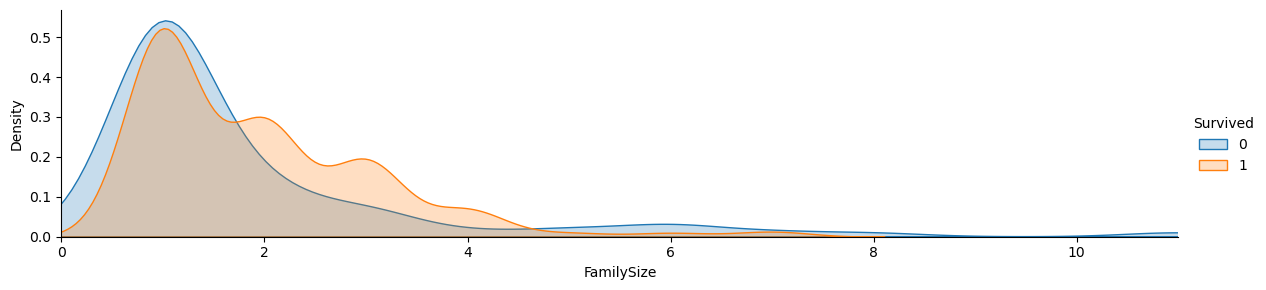

In [781]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',fill= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [782]:
#mapping the familySize Column
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in [train,test]:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [783]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,0.8,0,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,0.8,1,2,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,0.8,0,1,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,0.8,0,2,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,0.8,0,0,0,0.0


In [784]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareCategory,FamilySize
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,0.8,2,0,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,0.8,0,2,0,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,0.8,2,0,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,8.6625,0.8,0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,0.8,0,2,0,0.8


In [785]:
features_drop = ['Ticket','SibSp','Parch']
train = train.drop(features_drop, axis = 1)
test = test.drop(features_drop,axis=1)
train = train.drop(['PassengerId'], axis=1)
train = train.drop(['Name'], axis =1)

In [786]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FareCategory,FamilySize
0,0,3,0,1,7.2500,0.8,0,0,0,0.4
1,1,1,1,3,71.2833,0.8,1,2,2,0.4
2,1,3,1,1,7.9250,0.8,0,1,0,0.0
3,1,1,1,2,53.1000,0.8,0,2,2,0.4
4,0,3,0,2,8.0500,0.8,0,0,0,0.0


In [787]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,FareCategory,FamilySize
0,892,3,"Kelly, Mr. James",0,2,7.8292,0.8,2,0,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,7.0000,0.8,0,2,0,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3,9.6875,0.8,2,0,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2,8.6625,0.8,0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,0.8,0,2,0,0.8


In [788]:
#drop the Fare column in both datasets
train = train.drop(['Fare'], axis =1)
test = test.drop(['Fare'], axis =1)

In [789]:
train.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked,Title,FareCategory,FamilySize
0,0,3,0,1,0.8,0,0,0,0.4
1,1,1,1,3,0.8,1,2,2,0.4
2,1,3,1,1,0.8,0,1,0,0.0
3,1,1,1,2,0.8,0,2,2,0.4
4,0,3,0,2,0.8,0,0,0,0.0


In [790]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Cabin,Embarked,Title,FareCategory,FamilySize
0,892,3,"Kelly, Mr. James",0,2,0.8,2,0,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,0.8,0,2,0,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3,0.8,2,0,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2,0.8,0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,0.8,0,2,0,0.8


In [791]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    int64   
 3   Age           891 non-null    category
 4   Cabin         891 non-null    float64 
 5   Embarked      891 non-null    int64   
 6   Title         891 non-null    int64   
 7   FareCategory  891 non-null    category
 8   FamilySize    891 non-null    float64 
dtypes: category(2), float64(2), int64(5)
memory usage: 51.0 KB


In [792]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 8), (891,), (418, 9))

In [793]:
from sklearn.model_selection import cross_val_score

In [794]:
clf = KNeighborsClassifier(n_neighbors=13)
cv_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')

print("Accuracy scores for each fold:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Accuracy scores for each fold: [0.80446927 0.80898876 0.8258427  0.79775281 0.85955056]
Average accuracy: 0.8193208210407381


In [795]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
import numpy as np


In [796]:
# List of ML classifiers
classifiers = [
    KNeighborsClassifier(n_neighbors=13),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=13),
    GaussianNB(),
    SVC(),
    ExtraTreeClassifier(),
    GradientBoostingClassifier(n_estimators=10, learning_rate=1, max_features=3, max_depth=3, random_state=10),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

def evaluate_models():
    scoring = 'accuracy'
    
    # Loop through each classifier
    for i, clf in enumerate(classifiers):
        # Perform cross-validation
        scores = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
        
        # Print the mean accuracy score for each model
        print(f"Model {i}: Mean Accuracy = {np.mean(scores) * 100:.2f}%")

# Assuming train_data, target, and k_fold are defined elsewhere in your code

# Call the function to evaluate models
evaluate_models()


Model 0: Mean Accuracy = 82.72%
Model 1: Mean Accuracy = 79.35%
Model 2: Mean Accuracy = 80.81%
Model 3: Mean Accuracy = 79.57%
Model 4: Mean Accuracy = 83.39%
Model 5: Mean Accuracy = 79.13%
Model 6: Mean Accuracy = 82.27%
Model 7: Mean Accuracy = 80.80%
Model 8: Mean Accuracy = 80.81%


In [797]:
X_train.head()

,Pclass,Sex,Age,Cabin,Embarked,Title,FareCategory,FamilySize
0,3,0,1,0.8,0,0,0,0.4
1,1,1,3,0.8,1,2,2,0.4
2,3,1,1,0.8,0,1,0,0.0
3,1,1,2,0.8,0,2,2,0.4
4,3,0,2,0.8,0,0,0,0.0


In [798]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [799]:
X_test.head()

,Pclass,Name,Sex,Age,Cabin,Embarked,Title,FareCategory,FamilySize
0,3,"Kelly, Mr. James",0,2,0.8,2,0,0,0.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,0.8,0,2,0,0.4
2,2,"Myles, Mr. Thomas Francis",0,3,0.8,2,0,0,0.0
3,3,"Wirz, Mr. Albert",0,2,0.8,0,0,0,0.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,0.8,0,2,0,0.8


In [800]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Cabin,Embarked,Title,FareCategory,FamilySize
0,892,3,"Kelly, Mr. James",0,2,0.8,2,0,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,0.8,0,2,0,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3,0.8,2,0,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2,0.8,0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,0.8,0,2,0,0.8


In [801]:
Y_test.head()

,PassengerId,Pclass,Sex,Age,Cabin,Embarked,Title,FareCategory,FamilySize
0,892,3,0,2,0.8,2,0,0,0.0
1,893,3,1,3,0.8,0,2,0,0.4
2,894,2,0,3,0.8,2,0,0,0.0
3,895,3,0,2,0.8,0,0,0,0.0
4,896,3,1,1,0.8,0,2,0,0.8


In [802]:
Y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [803]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    int64   
 3   Age           418 non-null    category
 4   Cabin         418 non-null    float64 
 5   Embarked      418 non-null    int64   
 6   Title         418 non-null    int64   
 7   FareCategory  418 non-null    category
 8   FamilySize    418 non-null    float64 
dtypes: category(2), float64(2), int64(4), object(1)
memory usage: 24.2+ KB


In [804]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Sex           418 non-null    int64   
 3   Age           418 non-null    category
 4   Cabin         418 non-null    float64 
 5   Embarked      418 non-null    int64   
 6   Title         418 non-null    int64   
 7   FareCategory  418 non-null    category
 8   FamilySize    418 non-null    float64 
dtypes: category(2), float64(2), int64(5)
memory usage: 24.2 KB


In [805]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        891 non-null    int64   
 1   Sex           891 non-null    int64   
 2   Age           891 non-null    category
 3   Cabin         891 non-null    float64 
 4   Embarked      891 non-null    int64   
 5   Title         891 non-null    int64   
 6   FareCategory  891 non-null    category
 7   FamilySize    891 non-null    float64 
dtypes: category(2), float64(2), int64(4)
memory usage: 44.0 KB


In [806]:
clf1 = SVC()
clf1.fit(X_train, Y_train)
test
prediction = clf1.predict(X_train)


In [808]:

from sklearn.preprocessing import LabelEncoder

# Assuming you have X_train, Y_train, and X_test DataFrames

# Step 1: Preprocess the data
# Encode categorical variables in both X_train and X_test
label_encoder = LabelEncoder()

for column in ["Sex", "Embarked", "Title", "FareCategory"]:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# Exclude "Name" column from both X_train and X_test
X_train = X_train.drop("Name", axis=1, errors="ignore")
X_test = X_test.drop("Name", axis=1, errors="ignore")

# Step 2: Train the SVC model
svc_model = SVC()
svc_model.fit(X_train, Y_train.values.ravel())

# Step 3: Make predictions on X_test
X_test["Survived"] = svc_model.predict(X_test)

# Step 4: Write the results to a CSV file
X_test.to_csv("predicted_survival_results.csv", index=False)
